# [PCS3635] Análise de Dados

In [481]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

## Funções Estatísticas

In [482]:
def get_percentage_str(fraction: float) -> str:
    """Converts an fraction in to a percentage

    Args:
        fraction (float): _description_

    Returns:
        str: _description_
    
    Examples:
        >>> get_percentage_str(0.01537)
        54.23 %
        
        >>> get_percentage_str(0.5672434)
        56.72 %
    """
    percentage_str = 100*fraction
    percentage_str = f'{percentage_str:.2f}%'
    
    return percentage_str

In [483]:
df = pd.read_csv('encoded_data.csv')

## Descrição Básica do Dataframe 

In [484]:
df.head()

,date,PA_1,PA_2,PA_3,PA_4,PA_5,PA_6,PA_7,PA_8,PA_8_1,...,PS_4_2,PS_4_3,PS_4_4,PS_4_5,PS_5,PS_6,PS_7_1,PS_7_2,PS_7_3,PS_8
0,22/04/2024 15:22:50,1,4,8.0,12.0,4,3,5,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,2.0,2.0,1.0,1.0,-5.0,1.0,2.0,1.0,0.0,NaN
1,22/04/2024 15:23:42,1,1,12.0,40.0,4,1,5,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,3.0,2.0,2.0,2.0,5.0,1.0,0.0,2.0,1.0,O fato de LabDig exigir mais tempo que o norma...
2,22/04/2024 15:24:48,2,4,8.0,9.0,2,1,2,Falta de tempo para o EP de [PCS3616] Sistemas...,0.0,...,3.0,3.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,NaN
3,22/04/2024 15:29:14,2,4,6.0,30.0,4,3,4,"Se atrasar com o conteúdo outras disciplinas, ...",1.0,...,4.0,4.0,4.0,4.0,5.0,1.0,0.0,0.0,0.0,"A matéria em si foi exigente, foi puxada, p..."
4,22/04/2024 15:43:26,1,5,1.0,10.0,1,1,1,NaN,0.0,...,5.0,5.0,5.0,5.0,15.0,0.0,0.0,0.0,0.0,NaN


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     31 non-null     object 
 1   PA_1     31 non-null     int64  
 2   PA_2     31 non-null     int64  
 3   PA_3     29 non-null     float64
 4   PA_4     28 non-null     float64
 5   PA_5     31 non-null     int64  
 6   PA_6     31 non-null     int64  
 7   PA_7     31 non-null     int64  
 8   PA_8     29 non-null     object 
 9   PA_8_1   27 non-null     float64
 10  PA_8_2   31 non-null     int64  
 11  PA_8_3   31 non-null     int64  
 12  PA_8_4   31 non-null     int64  
 13  PA_8_5   30 non-null     float64
 14  PA_8_6   31 non-null     int64  
 15  PA_8_7   31 non-null     int64  
 16  PA_8_8   31 non-null     int64  
 17  PA_8_9   31 non-null     int64  
 18  PA_9     28 non-null     float64
 19  PA_10    31 non-null     int64  
 20  PA_11_1  29 non-null     float64
 21  PA_11_2  29 non-nu

In [486]:
df.shape

(31, 53)

## Configuração das Figuras

In [487]:
# if this variable is True, when the notebook is fully executed, all the figures will be replaced
# by the new figures of this notebook
save_all_figures = True

In [488]:
fig_default_size = (8, 6)
fig_default_color = 'darkblue'
top_bar_text_offset = 0.5

fig_2_subplots_default_size = (12, 8)

## Pesquisa Acadêmica

### PA_1
De qual turma você faz parte?<br>
- (a) Segunda-Feira<br>
- (b) Quarta-Feira

In [489]:
PA_1 = df['PA_1']

# separation by groups
monday_df = df[df['PA_1'] == 1]
wednesday_df = df[df['PA_1'] == 2]

PA_1.shape, monday_df.shape, wednesday_df.shape

((31,), (11, 53), (20, 53))

In [490]:
# total number of students per group
monday_total_n = 38
wednesday_total_n = 27

# total number of students that answered the research per group
monday_total_n_answered = monday_df.shape[0]
wednesday_total_n_answered = wednesday_df.shape[0]

# n answers / n students per group
monday_fraction_answered = monday_total_n_answered/monday_total_n
wednesday_fraction_answered = wednesday_total_n_answered/wednesday_total_n

# n answers / n students per group in percentage
monday_fraction_answered_percentage = 100*monday_fraction_answered
wednesday_fraction_answered_percentage = 100*wednesday_fraction_answered

groups = {
    'monday_total_n': monday_total_n,
    'wednesday_total_n': wednesday_total_n,
    'monday_total_n_answered': monday_total_n_answered,
    'wednesday_total_n_answered': wednesday_total_n_answered,
    'monday_fraction_answered': monday_fraction_answered,
    'wednesday_fraction_answered': wednesday_fraction_answered,
    'monday_fraction_answered_percentage': monday_fraction_answered_percentage,
    'wednesday_fraction_answered_percentage': wednesday_fraction_answered_percentage
}

groups

{'monday_total_n': 38,
 'wednesday_total_n': 27,
 'monday_total_n_answered': 11,
 'wednesday_total_n_answered': 20,
 'monday_fraction_answered': 0.2894736842105263,
 'wednesday_fraction_answered': 0.7407407407407407,
 'monday_fraction_answered_percentage': 28.947368421052634,
 'wednesday_fraction_answered_percentage': 74.07407407407408}

In [491]:
# resume
PA_1_resume = {
    'turma': ['segunda', 'quarta'],
    'total de alunos': [groups['monday_total_n'], groups['wednesday_total_n']],
    'quantidade de respostas': [groups['monday_total_n_answered'], groups['wednesday_total_n_answered']],
    'quantidade de respostas (%)': [groups['monday_fraction_answered_percentage'], groups['wednesday_fraction_answered_percentage']]
}

PA_1_resume_table = pd.DataFrame(PA_1_resume)

PA_1_resume_table

,turma,total de alunos,quantidade de respostas,quantidade de respostas (%)
0,segunda,38,11,28.947368
1,quarta,27,20,74.074074


### PA_2
A disciplina possuiu dois créditos de trabalho (3h20/semana). O tempo gasto por você com a disciplina, em período fora de sala de aula, ficou dentro desse limite?
- (a) Foi muito abaixo desse limite
- (b) Foi abaixo do limite
- (c) Foi adequado
- (d) Foi acima desse limite
- (e) Foi muito acima do limite

In [492]:
PA_2 = df['PA_2']
PA_2_monday = monday_df['PA_2']
PA_2_wednesday = wednesday_df['PA_2']

PA_2.shape, PA_2_monday.shape, PA_2_wednesday.shape

((31,), (11,), (20,))

In [493]:
PA_2_classes = [1, 2, 3, 4, 5]

# index mapping
PA_2_categories_mapping = {
    1: 'muito abaixo',
    2: 'abaixo',
    3: 'adequado', 
    4: 'acima',
    5: 'muito acima'
}

# categories
PA_2_categories = [PA_2_categories_mapping[PA_2_class] for PA_2_class in PA_2_classes]

# counting categories
PA_2_counting = PA_2.value_counts()
PA_2_monday_counting = PA_2_monday.value_counts()
PA_2_wednesday_counting = PA_2_wednesday.value_counts()

# n = quantity of answers per dataframe
PA_2_n_answers = PA_2.shape[0]
PA_2_monday_n_answers = PA_2_monday.shape[0]
PA_2_wednesday_n_answers = PA_2_wednesday.shape[0]

# filling with 0 non observed categories
PA_2_counting = PA_2_counting.reindex(PA_2_classes, fill_value=0)
PA_2_monday_counting = PA_2_monday_counting.reindex(PA_2_classes, fill_value=0)
PA_2_wednesday_counting = PA_2_wednesday_counting.reindex(PA_2_classes, fill_value=0)

# casting in numpy arrays
PA_2_counting = np.array(PA_2_counting)
PA_2_monday_counting = np.array(PA_2_monday_counting)
PA_2_wednesday_counting = np.array(PA_2_wednesday_counting)

# resume
print(f'PA_2_counting\nn_answers: {PA_2_n_answers}\narray: {PA_2_counting}\n')
print(f'PA_2_monday_counting\nn_answers: {PA_2_monday_n_answers}\narray: {PA_2_monday_counting}\n')
print(f'PA_2_wednesday_counting\nn_answers: {PA_2_wednesday_n_answers}\narray: {PA_2_wednesday_counting}\n')

PA_2_counting
n_answers: 31
array: [ 1  0  0 13 17]

PA_2_monday_counting
n_answers: 11
array: [1 0 0 5 5]

PA_2_wednesday_counting
n_answers: 20
array: [ 0  0  0  8 12]



In [494]:
# frequencies calculation
PA_2_frequency = PA_2_counting/sum(PA_2_counting)
PA_2_monday_frequency = PA_2_monday_counting/sum(PA_2_monday_counting)
PA_2_wednesday_frequency = PA_2_wednesday_counting/sum(PA_2_wednesday_counting)

print(f'general: {PA_2_frequency}\nmonday: {PA_2_monday_frequency}\nwednesday: {PA_2_wednesday_frequency}')

general: [0.03225806 0.         0.         0.41935484 0.5483871 ]
monday: [0.09090909 0.         0.         0.45454545 0.45454545]
wednesday: [0.  0.  0.  0.4 0.6]


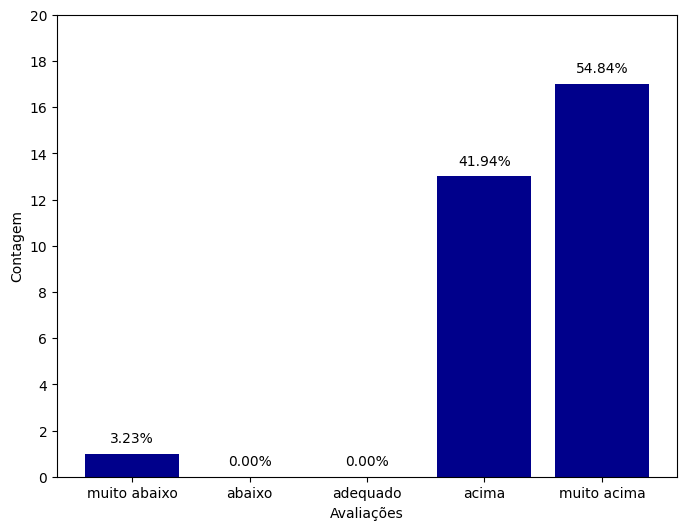

In [495]:
# plotting PA_2 for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 20)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_general_classes')
    
# showing the figure
plt.show()

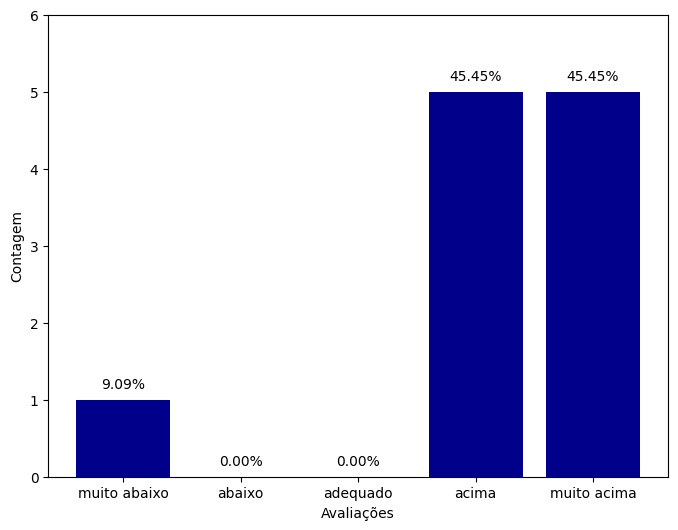

In [496]:
# plotting PA_2 for general counting in monday
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_monday_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 6)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_monday_counting[i] + 0.3*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_monday_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_monday_classes')
    
# showing the figure
plt.show()

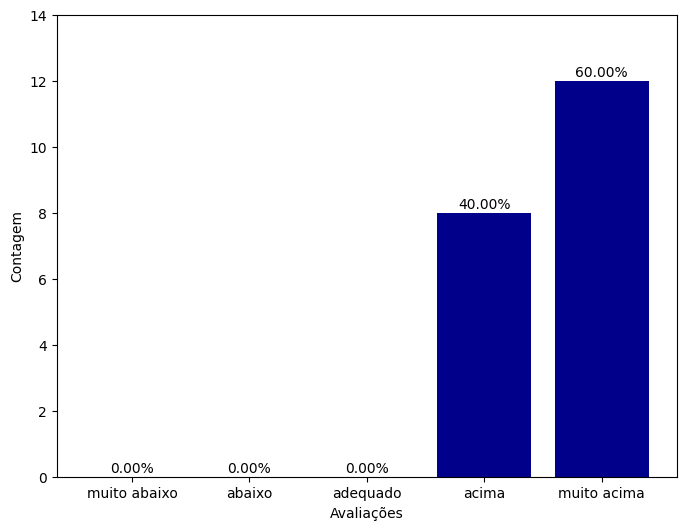

In [497]:
# plotting PA_2 for general counting in wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_wednesday_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 14)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_wednesday_counting[i] + 0.3*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_wednesday_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_wednesday_classes')
    
# showing the figure
plt.show()

Binarização dos dados

In [498]:
# binarization of the data

# general
PA_2_bin_counting_under = sum(PA_2_counting[0:2])
PA_2_bin_counting_over = sum(PA_2_counting[3:5])
PA_2_bin_counting = np.array([PA_2_bin_counting_under, PA_2_bin_counting_over])

# monday
PA_2_monday_bin_counting_under = sum(PA_2_monday_counting[0:2])
PA_2_monday_bin_counting_over = sum(PA_2_monday_counting[3:5])
PA_2_monday_bin_counting = np.array([PA_2_monday_bin_counting_under, PA_2_monday_bin_counting_over])

# wednesday
PA_2_wednesday_bin_counting_under = sum(PA_2_wednesday_counting[0:2])
PA_2_wednesday_bin_counting_over = sum(PA_2_wednesday_counting[3:5])
PA_2_wednesday_bin_counting = np.array([PA_2_wednesday_bin_counting_under, PA_2_wednesday_bin_counting_over])

PA_2_bin_counting, PA_2_monday_bin_counting, PA_2_wednesday_bin_counting

(array([ 1, 30]), array([ 1, 10]), array([ 0, 20]))

In [499]:
# frequency couting for the binary data
PA_2_bin_frequency = PA_2_bin_counting/sum(PA_2_bin_counting)
PA_2_monday_bin_frequency = PA_2_monday_bin_counting/sum(PA_2_monday_bin_counting)
PA_2_wednesday_bin_frequency = PA_2_wednesday_bin_counting/sum(PA_2_wednesday_bin_counting)

PA_2_bin_frequency, PA_2_monday_bin_frequency, PA_2_wednesday_bin_frequency

(array([0.03225806, 0.96774194]),
 array([0.09090909, 0.90909091]),
 array([0., 1.]))

In [500]:
# resume

PA_2_resume = {
    'geral (contagem)': PA_2_bin_counting,
    'segunda (contagem)': PA_2_monday_bin_counting,
    'quarta (contagem)': PA_2_wednesday_bin_counting,
    'geral (frequência)': PA_2_bin_frequency, 
    'segunda (frequência)': PA_2_monday_bin_frequency, 
    'quarta (frequência)': PA_2_wednesday_bin_frequency
}

PA_2_resume_table = pd.DataFrame(PA_2_resume)

PA_2_resume_table

,geral (contagem),segunda (contagem),quarta (contagem),geral (frequência),segunda (frequência),quarta (frequência)
0,1,1,0,0.032258,0.090909,0.0
1,30,10,20,0.967742,0.909091,1.0


### PA_3
Durante as semanas de projeto, você participou do openlab com que frequência? Favor, indicar quantas vezes você foi e por quanto tempo costumava ficar nele.

In [501]:
PA_3 = df['PA_3']
PA_3_monday = monday_df['PA_3']
PA_3_wednesday = wednesday_df['PA_3']

PA_3 = PA_3.dropna()
PA_3_monday = PA_3_monday.dropna()
PA_3_wednesday = PA_3_wednesday.dropna()

PA_3.shape, PA_3_monday.shape, PA_3_wednesday.shape

((29,), (11,), (18,))

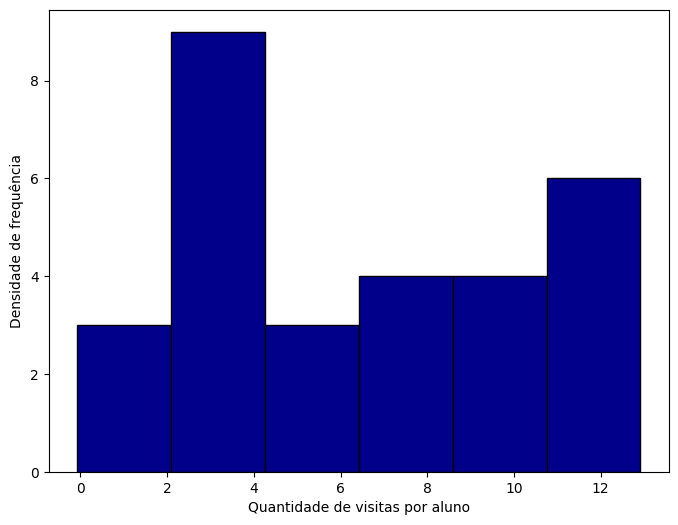

In [502]:
# plotting PA_3 histogram for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3, bins=6, color=fig_default_color, align='left', edgecolor='black')
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Densidade de frequência')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_histogram')
    
# showing the figure
plt.show()

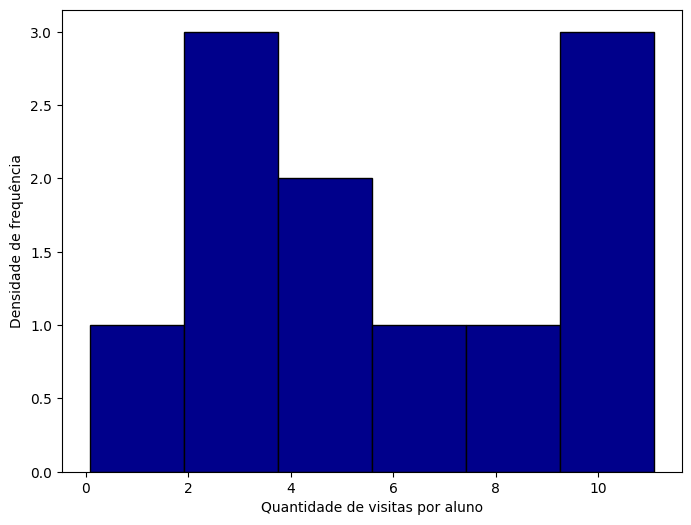

In [503]:
# plotting PA_3 histogram for monday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3_monday, bins=6, color=fig_default_color, align='left', edgecolor='black')
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Densidade de frequência')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_monday_histogram')
    
# showing the figure
plt.show()

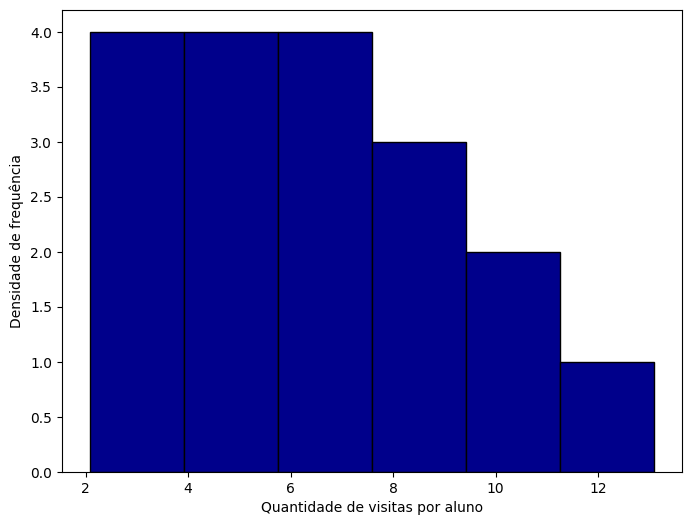

In [504]:
# plotting PA_3 histogram for wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3_wednesday, bins=6, color=fig_default_color, align='left', edgecolor='black')
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Densidade de frequência')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_wednesday_histogram')
    
# showing the figure
plt.show()

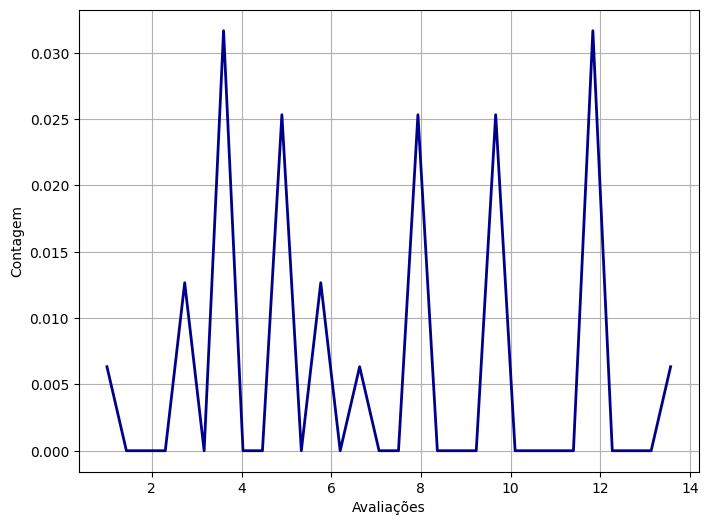

In [505]:
# plotting PA_3 density frequency for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)
hist, bins = np.histogram(PA_3, bins=30, density=True)


# plotting the density frequency
PA_3_interval_width = bins[1] - bins[0]
PA_3_frequency_density = hist / (len(PA_3) * PA_3_interval_width)
plt.plot(bins[:-1], PA_3_frequency_density, color=fig_default_color, lw=2)
plt.xlabel('Quantidade de visitas por aluno')
plt.ylabel('Densidade de frequência')
plt.grid(True)

# axs setting
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_density_frequency')
    
# showing the figure
plt.show()

### PA_4
Quantas horas aproximadamente, você investiu no projeto, somente de tempo fora de sala de aula por semana? (openlab + tempo na poli ou em casa, desenvolvendo o projeto)

In [506]:
PA_4 = df['PA_4']
PA_4_monday = monday_df['PA_4']
PA_4_wednesday = wednesday_df['PA_4']

PA_4 = PA_4.dropna()
PA_4_monday = PA_4_monday.dropna()
PA_4_wednesday = PA_4_wednesday.dropna()

PA_4.shape, PA_4_monday.shape, PA_4_wednesday.shape

((28,), (11,), (17,))

### PA_5
De forma geral, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito prejuízo]

### PA_6
Durante as semanas de experimentos, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito]

### PA_7
Durante as semanas de projeto, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito]

### PA_8
Se você sofreu prejuízo acadêmico nas outras disciplinas, quais dos seguintes itens se enquadram no seu caso? (deixar em branco, caso contrário)
- **[PA_8_1]** Se atrasar com o conteúdo outras disciplinas
- **[PA_8_2]** Perder aula de outras disciplinas
- **[PA_8_3]** Perda de desempenho nas provas
- **[PA_8_4]** Perda de desempenho nos testinhos de [PTC3007] - Sistemas e Sinais
- **[PA_8_5]** Falta de tempo para relatório de [MAP3122] - Cálculo Numérico
- **[PA_8_6]** Falta de tempo para o EP de [PCS3616] Sistemas de Programação
- **[PA_8_7]** Falta de tempo para o projeto de [PCS3623] Banco de Dados I
- **[PA_8_8]** Dificuldades com matérias do curso semestral (DP ou outros casos)
- **[PA_8_9]** Outros… [Texto Livre]

### PA_9
Se você perdeu aulas para fazer o projeto da disciplina, diga uma estimativa da quantidade de aulas perdidas, caso você a tenha. [Texto Livre]

### PA_10
Numa escala de 1 a 5, qual o seu grau de satisfação geral com o tempo despendido em Lab Dig?
- (a) 1 [Muito insatisfeita(o)]
- (a) 2
- (a) 3
- (a) 4
- (a) 5 [Muito satisfeita(o)]


### PA_11
Numa escala de 1 a 5, como você avalia a especificação de requisitos do projeto, nas semanas 0.1 e 0.2, nos aspectos abaixo? [Escala de 1 a 5 para cada item]
- **PA_11_1** plausibilidade técnica, dentro do prazo proposto	
- **PA_11_2** coerência com o conteúdo dado na disciplina	
- **PA_11_3** flexibilidade com o projeto, para que o grupo pudesse optar por algo mais simples	
- **PA_11_4** clareza da orientação	
- **PA_11_5** comunicação dos docentes	
- **PA_11_6** complexidade do projeto, de forma geral	


### PA_12
Qual o seu grau de satisfação com a disciplina quanto aos elementos abaixo? [respostas possíveis são Muito Insatisfeito(a), Insatisfeito(a), Neutro(a), Satisfeito(a) e Muito Satisfeito(a)]
- **[PA_12_1]** A Disciplina em Geral	
- **[PA_12_2]** Semanas de Experimento	
- **[PA_12_3]** Semanas de Projeto	
- **[PA_12_4]** Quantidade de relatórios	
- **[PA_12_5]** Complexidade dos relatórios	
- **[PA_12_6]** Uso do tempo de sala	
- **[PA_12_7]** Uso do tempo fora de sala	
- **[PA_12_8]** Comunicação com os docentes	
- **[PA_12_9]** Flexibilidade dos docentes	

## Pesquisa de Saúde

### PS_1
Você sentiu algum prejuízo em termos de saúde mental?
- (a) 1 [Não, estou bem]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Sim, e muito]

    

### PS_2
Você sentiu algum prejuízo em termos de saúde física?
- (a) 1 [Não, estou bem]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Sim, e muito]

### PS_3
Quais dos sintomas abaixo você apresentou e com que intensidade? [Respostas possíveis são: nenhuma manifestação, apresentei um pouco, moderado e apresentei muito]
- **[PS_3_1]** Cansaço	
- **[PS_3_2]** Estresse	
- **[PS_3_3]** Ansiedade	
- **[PS_3_4]** Irritação	
- **[PS_3_5]** Depressão	

### PS_4
Durante as semanas de projeto, como você avalia, a qualidade dos seguintes aspectos? [Respostas possíveis são: péssimo, ruim, neutro, bom e excelente]
- **[PS_4_1]** sono	
- **[PS_4_2]** alimentação	
- **[PS_4_3]** concentração	
- **[PS_4_4]** humor	
- **[PS_4_5]** bem-estar geral	

### PS_5
Em relação a alimentação, você conseguiu se alimentar adequadamente durante as semanas de projeto?
- **[PS_5_1]** Sim, me alimentei de forma saudável
- **[PS_5_2]** Sim, me alimentei normalmente
- **[PS_5_3]** Não, eu me alimentei mal
- **[PS_5_4]** Não, tive prejuízos na minha alimentação

### PS_6
Se você costuma se alimentar nos bandeijões, a frequência com que você os frequentava foi alterada?
- (a) Sim
- (b) Não



### PS_7
Você pulou refeições nas semanas de projetos? Com que frequência? [Respostas Possíveis são: não pulei, pulei às vezes e pulei frequentemente]
- **[PS_7_1]** café da manhã	
- **[PS_7_2]** almoço	
- **[PS_7_3]** jantar	

### PS_8
Caso você se sinta confortável, use esse espaço para se expressar. Garantimos que a resposta será anônima e não será identificada por ninguém. Você pode contar seu relato com a disciplina e como se sentiu em relação a ela, ou dizer o que quiser, sob qualquer posicionamento. [Texto Livre]
